In [1]:
# For visualization
from helper_draw.draw_graph import draw_dot
# For functionality
from value import Value
from neural_net import Neuron, Layer, MLP

<h3> Initial Testing </h3>

Implementation of:
    <ul>
    <li> Addition </li>
    <li> Multiplication </li>
    <li> Children </li>
    <li> Calculating Gradients </li>
    </ul>

In [2]:
a = Value(6, 'a')
print(a)
b = Value(8, 'b')
print(b)

Value(data:6, label:a)
Value(data:8, label:b)


In [3]:
c = a+b
c.label = 'c'
print(c)

d = Value(data = 3, label = 'd')
print(d)

e = d*c
e.label = 'e'
print(e)

Value(data:14, label:c)
Value(data:3, label:d)
Value(data:42, label:e)


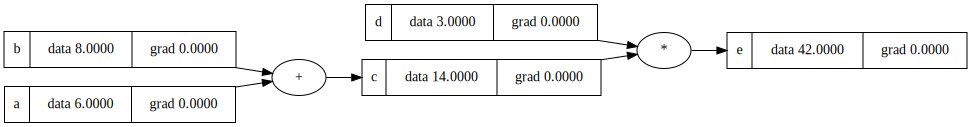

In [4]:
draw_dot(e)

<h3> Neuron Basic Testing </h3>

In [5]:
# Using the same values as the learning resource to verify output values

# Inputs
x1 = Value(data = 2, label = 'x1')
x2 = Value(data = 0, label = 'x2')

# Weights
w1 = Value(data = -3, label = 'w1')
w2 = Value(data = 1, label = 'w2')

# Bias
b = Value(data = 6.8813735870195432, label = 'b')

xw1 = x1 * w1
xw1.label = 'xw1'

xw2 = x2 * w2
xw2.label = 'xw2'

xw1xw2 = xw1 + xw2
xw1xw2.label = 'xw1 + xw2'

o = xw1xw2 + b
o.label = 'o'

oa = o.tanh()
oa.label = 'oa'

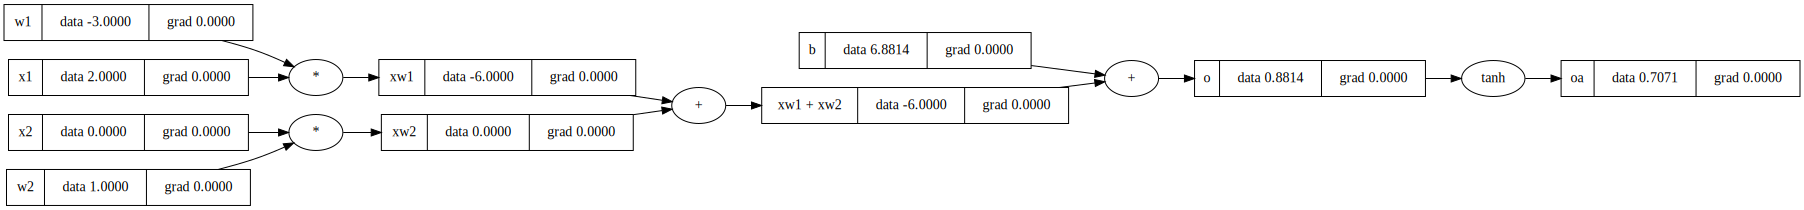

In [6]:
draw_dot(oa)

In [7]:
oa.back_prop()

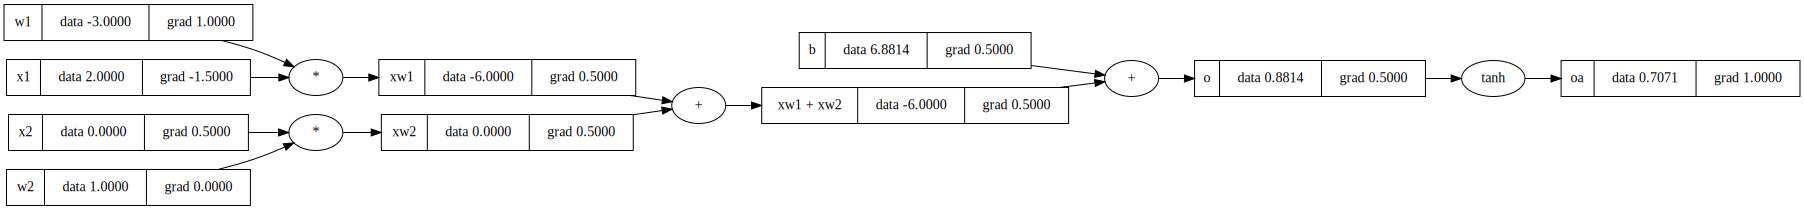

In [8]:
draw_dot(oa)

<h3> Adding More Functionality </h3>

In [9]:
# Using the same values as the learning resource to verify output values

# Inputs
x1 = Value(data = 2, label = 'x1')
x2 = Value(data = 0, label = 'x2')

# Weights
w1 = Value(data = -3, label = 'w1')
w2 = Value(data = 1, label = 'w2')

# Bias
b = Value(data = 6.8813735870195432, label = 'b')

xw1 = x1 * w1
xw1.label = 'xw1'

xw2 = x2 * w2
xw2.label = 'xw2'

xw1xw2 = xw1 + xw2
xw1xw2.label = 'xw1 + xw2'

o = xw1xw2 + b
o.label = 'o'

# Spelled out calculation of tanh to test the newly implemented functions
e2x = (2 * o).exp()
e2x.label = 'e2x'
oa = (e2x - 1) / (e2x + 1)
oa.label = 'oa'

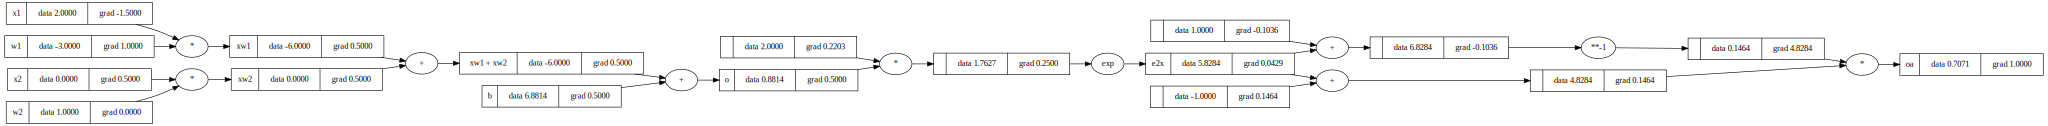

In [10]:
oa.back_prop()
draw_dot(oa)

### Torch Implementation

In [11]:
import torch

In [12]:
x1 = torch.Tensor([2.0]).double()
x1.requires_grad = True

x2 = torch.Tensor([0.0]).double()
x2.requires_grad = True

w1 = torch.Tensor([-3.0]).double()
w1.requires_grad = True

w2 = torch.Tensor([1.0]).double()
w2.requires_grad = True

b = torch.Tensor([6.8813735870195432]).double()
b.requires_grad = True

bef_ac = x1*w1 + x2*w2 + b
out = torch.tanh(bef_ac)

print('output data = ' + str(out.data.item()))
out.backward()

print('-------------------------------')

print('x1 grad = ' + str(x1.grad.item()))
print('w1 grad = ' + str(w1.grad.item()))

print('x2 grad = ' + str(x2.grad.item()))
print('w2 grad = ' + str(w2.grad.item()))

output data = 0.7071066904050358
-------------------------------
x1 grad = -1.5000003851533106
w1 grad = 1.0000002567688737
x2 grad = 0.5000001283844369
w2 grad = 0.0


### Multi Layer Perceptron (MLP) Testing

In [13]:
x = [3.0, 4.0, -2.0, -3.0]

# Neuron class testing
n = Neuron(4)
print(n(x))
print()

# Layer class testing
n = Layer(4,2)
print(n(x))
print()

# MLP Class Testing
mlp_model = MLP(4, [4, 3, 2, 1])
print(mlp_model(x))
print()

Value(data:-0.9980253417124745, label:)

[Value(data:0.37668246416646634, label:), Value(data:-0.9644840274900841, label:)]

[Value(data:-0.3407543491479964, label:)]



In [14]:
# Dataset and Prediction using model
x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

y = [1.0, -1.0, -1.0, 1.0]

mlp_model = MLP(3, [4, 4, 1])

y_pred = [mlp_model(xi) for xi in x]
y_pred

[[Value(data:0.33047186584628857, label:)],
 [Value(data:0.29648080182221054, label:)],
 [Value(data:0.35849830152676787, label:)],
 [Value(data:0.3291952935744668, label:)]]

In [15]:
print(str(len(mlp_model.parameters())) + " parameters available for gradient descent.") # Number of parameters to adjust

41 parameters available for gradient descent.


In [16]:
for k in range(25):
    # Forward Pass
    # Calculating loss using MSE
    y_pred = [mlp_model(xi) for xi in x]
    loss = sum([(y_out[0] - y_gt)**2 for y_gt, y_out in zip(y, y_pred)])
    
    # Backward Pass
    # Setting the gradients of the parameter to 0 before backward propogation (gradients are set to be additive)
    for p in mlp_model.parameters():
        p.grad = 0.0
    
    loss.back_prop()
    
    # Gradient Descent
    for p in mlp_model.parameters():
        p.data += 0.05 * -p.grad
    
    print("Step: " + str(k) + "     " + "Loss: " + str(loss.data))

Step: 0     Loss: 4.424626981330671
Step: 1     Loss: 3.425481049497682
Step: 2     Loss: 2.598819189572676
Step: 3     Loss: 1.8507079839479812
Step: 4     Loss: 1.2020466602041884
Step: 5     Loss: 0.7404832619788654
Step: 6     Loss: 0.4765341762296787
Step: 7     Loss: 0.332520344187349
Step: 8     Loss: 0.24876387094893904
Step: 9     Loss: 0.1959766487142911
Step: 10     Loss: 0.1603550305639463
Step: 11     Loss: 0.13498337926629253
Step: 12     Loss: 0.11612903733109899
Step: 13     Loss: 0.10163694772870616
Step: 14     Loss: 0.09018975612472167
Step: 15     Loss: 0.08094276102417539
Step: 16     Loss: 0.07333216834741572
Step: 17     Loss: 0.06696869490233656
Step: 18     Loss: 0.0615756591047536
Step: 19     Loss: 0.05695144641109653
Step: 20     Loss: 0.052945925402698324
Step: 21     Loss: 0.04944515956310579
Step: 22     Loss: 0.04636122080477266
Step: 23     Loss: 0.04362523525406617
Step: 24     Loss: 0.04118253176602059


In [17]:
y_pred

[[Value(data:0.9058071590871001, label:)],
 [Value(data:-0.9367372868014782, label:)],
 [Value(data:-0.8754864432023314, label:)],
 [Value(data:0.8868432777996241, label:)]]